<a href="https://colab.research.google.com/github/nissrinayy/deeplearning/blob/main/Week5/RNN_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RNN Model TensorFlow : ReviewTokoBaju.csv Dataset 🐯**

## Instalasi dan Import Library

In [ ]:
!pip install tensorflow


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix


## Load Dataset

In [ ]:
# Load the dataset (Ensure the CSV file is uploaded to your Google Colab environment)
# Replace with the correct path if necessary
file_path = '/content/ReviewTokoBaju.csv'
data = pd.read_csv(file_path)

## PreProcessing

In [ ]:
# Basic function for text cleaning
def clean_text_simple(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

In [ ]:
# Apply cleaning function to Review Text
data['Cleaned Review Text'] = data['Review Text'].apply(lambda x: clean_text_simple(str(x)))


In [ ]:
# Drop rows with missing Review Text or Recommended IND
data = data.dropna(subset=['Cleaned Review Text', 'Recommended IND'])


In [ ]:
# Split the dataset into features (X) and target (y)
X = data['Cleaned Review Text']
y = data['Recommended IND']

In [ ]:
# Convert text into numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words
X_tfidf = vectorizer.fit_transform(X)


In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


## Build Model

In [ ]:
# Build the RNN model using TensorFlow
model = models.Sequential([
    layers.Embedding(input_dim=5000, output_dim=128, input_length=5000),
    layers.SimpleRNN(128, return_sequences=True),
    layers.SimpleRNN(128),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Print the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Train Model

In [ ]:
# Train the model
history = model.fit(X_train.toarray(), y_train, epochs=5, batch_size=64, validation_data=(X_test.toarray(), y_test))


Epoch 1/5
294/294 ━━━━━━━━━━━━━━━━━━━━ 228s 756ms/step - accuracy: 0.8117 - loss: 0.4797 - val_accuracy: 0.8189 - val_loss: 0.4775
Epoch 2/5
294/294 ━━━━━━━━━━━━━━━━━━━━ 257s 748ms/step - accuracy: 0.8226 - loss: 0.4707 - val_accuracy: 0.8189 - val_loss: 0.4740
Epoch 3/5
294/294 ━━━━━━━━━━━━━━━━━━━━ 262s 750ms/step - accuracy: 0.8237 - loss: 0.4704 - val_accuracy: 0.8189 - val_loss: 0.4814
Epoch 4/5
294/294 ━━━━━━━━━━━━━━━━━━━━ 262s 750ms/step - accuracy: 0.8243 - loss: 0.4669 - val_accuracy: 0.8189 - val_loss: 0.4731
Epoch 5/5
294/294 ━━━━━━━━━━━━━━━━━━━━ 262s 750ms/step - accuracy: 0.8243 - loss: 0.4676 - val_accuracy: 0.8189 - val_loss: 0.4764


## Evaluate & Visualisasi

In [ ]:
# Evaluate the model on the test data
y_pred = (model.predict(X_test.toarray()) > 0.5).astype(int)


147/147 ━━━━━━━━━━━━━━━━━━━━ 31s 191ms/step


In [ ]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [ ]:
# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')


Accuracy: 0.8189
Precision: 0.8189
Recall: 1.0000
F1 Score: 0.9004
ROC AUC: 0.5000


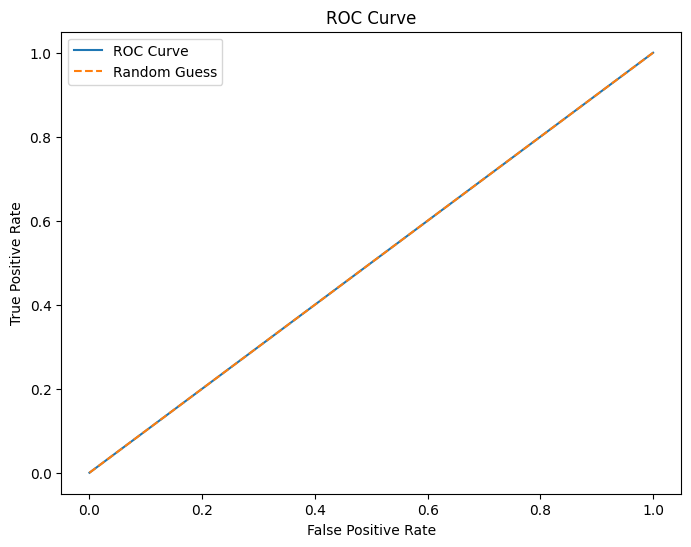

In [ ]:
# Generate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

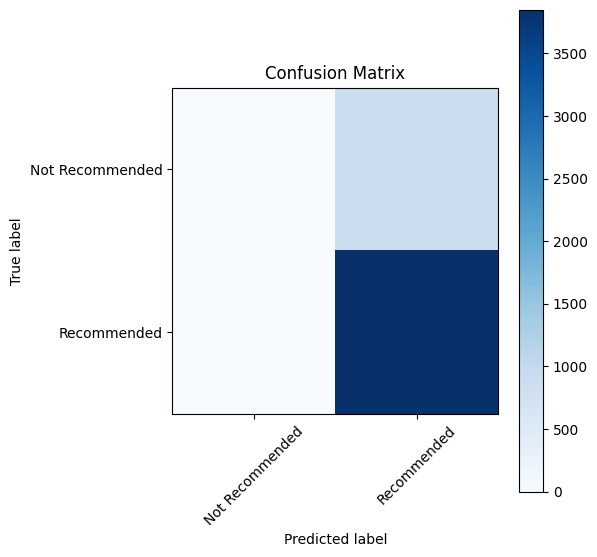

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(2), ['Not Recommended', 'Recommended'], rotation=45)
plt.yticks(np.arange(2), ['Not Recommended', 'Recommended'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [ ]:
# Visualize the training and validation accuracy and loss over epochs
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

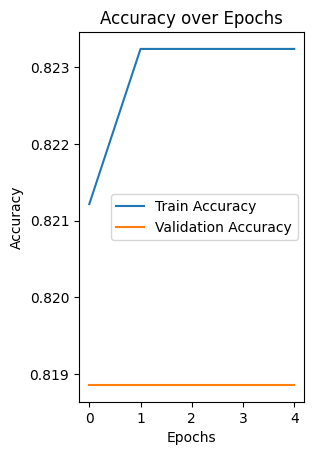

In [ ]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

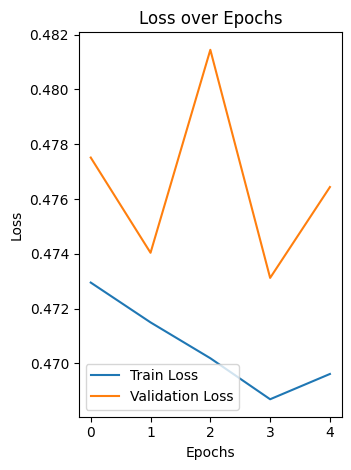

In [ ]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()